In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

Kullbuck-Leibler Divergence(KL Divergence) is  a measure on $P(X)$ and $Q(X)$.

$$
P(X) = N(0, 2) \\
Q(X) = N(0, 3)
$$

KL Divergence could be compute as follows:  

$$
    D_{KL}[P(X)||Q(X)] = \sum_{x \in_{X} } P(x) \log (\frac{P(x)}{Q(x)}) \ {\rm (if \ X \ is \ a \ discreate \  random \ variable) }\\
    D_{KL}[P(X)||Q(X)] = \int P(x) \log (\frac{P(x)}{Q(x)}dx) \ {\rm (else \ if \ X \ is \ a \ continuous \ random \ variable})
$$

for random all variable $x \in X$   
KL Divergence calculates the weighted average on the difference between $P(X)$ and $Q(X)$ at $x$.

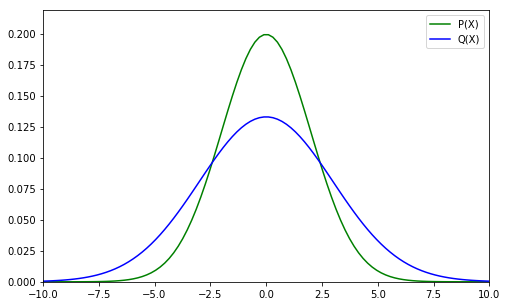

In [3]:
def gaussian(mu, sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-0.5*(x-mu)**2/sigma**2)
    
mu = 0 
sigma_p = 2
sigma_q = 3

min_x = -10
max_x = 10
x = np.linspace(min_x, max_x, 100)

P_x = gaussian(mu, sigma_p)
Q_x = gaussian(mu, sigma_q)

plt.figure(figsize=(8, 5))
plt.xlim(min_x, max_x)
plt.ylim(0 , max(P_x)*1.1)
plt.plot(x, P_x, color='green', label='P(X)')
plt.plot(x, Q_x, color='blue', label='Q(X)')

plt.legend(loc='best')
plt.show()

calculate the forward KL Divergence  
$$
 D_{KL}[P(X)||Q(X)] = \sum_{x \in_{X} } P(x) \log (\frac{P(x)}{Q(x)})  \tag{1}
$$

In [4]:
KL = np.sum(P_x * (np.log(P_x/Q_x)))
KL

0.63206787763473582

calculate the reverse KL Divergence  
$$ D_{KL}[Q(X)||P(X)] = \sum_{x \in_{X} } Q(x) \log (\frac{Q(x)}{P(x)}) \tag{2} $$

In [5]:
KL_r = np.sum(Q_x * (np.log(Q_x/P_x)))
KL_r

1.0572156418087155

As you can see, KL Divergence is not symmetric.  
$ D_{KL}[P(X)||Q(X)] \neq D_{KL}[Q(X)||P(X)] $

According to $(1)$, the difference between $P(x)$ and $Q(x)$ is weighted by $P(x)$.

Consider $P(x) = 0$ for a particular $x$.  
If $P(x) = 0$, Theres is no consequence at all to have very big differnce between $P(x)$ and $Q(x)$.  
In other words, $Q(x)$ can be ignored and $KL $Divergence $= 0$  whenever $P(x) = 0$.

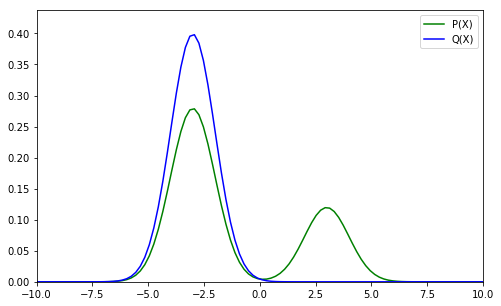

In [6]:
mu_p = -3
sigma_p = 1
mu_q1 = 3
mu_q2 = -3
sigma_q1 = 1
sigma_q2 = 1

min_x = -10
max_x = 10
x = np.linspace(min_x, max_x, 100)

P_x = 0.3 * gaussian(mu_q1, sigma_q1) + 0.7 * gaussian(mu_q2, sigma_q2)
Q_x = gaussian(mu_p, sigma_p)

plt.figure(figsize=(8, 5))
plt.xlim(min_x, max_x)
plt.ylim(0 , max(Q_x)*1.1)
plt.plot(x, P_x, color='green', label='P(X)')
plt.plot(x, Q_x, color='blue', label='Q(X)')

plt.legend(loc='best')
plt.show()

In [7]:
KL = np.sum(P_x * (np.log(P_x/Q_x)))
KL

23.723562339523294

According to above graph, Left side mode of $Q(X)$ is not covered by $P(X)$.  
It means these area doesn't contribute to $KL$ Divergence.  
Although it looks like very fitted, It is high $KL$ Divergence compared to next graph.

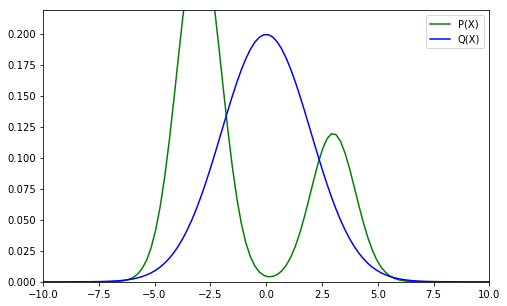

In [8]:
mu_p = 0
sigma_p = 2
mu_q1 = 3
mu_q2 = -3
sigma_q1 = 1
sigma_q2 = 1

min_x = -10
max_x = 10
x = np.linspace(min_x, max_x, 100)

P_x = 0.3 * gaussian(mu_q1, sigma_q1) + 0.7 * gaussian(mu_q2, sigma_q2)
Q_x = gaussian(mu_p, sigma_p)

plt.figure(figsize=(8, 5))
plt.xlim(min_x, max_x)
plt.ylim(0 , max(Q_x)*1.1)
plt.plot(x, P_x, color='green', label='P(X)')
plt.plot(x, Q_x, color='blue', label='Q(X)')

plt.legend(loc='best')
plt.show()

In [9]:
KL = np.sum(P_x * (np.log(P_x/Q_x)))
KL

4.1371408833821253

According to above graph, Left side mode of $P(x)$ is not covered by $Q(x)$.  
However, It contribute to $KL$ Divergence because Left side mode of $P(x)$ > 0 .  
so, $KL$ Divergence will increase compared to previous graph though it is .

and KL Divergence can be written as follows:

**KL Divergence(Relative Entropy)**
$$
    D_{KL}(P(X)||Q(X)) = H (P(X), Q(X)) - H(P(X))
$$

**Entropy**
$$
    H(P(X)) = - \sum_{x \in X} P(x) \log(P(x))
$$

**Cross Entropy**
$$
    H(P(X), Q(X)) = - \sum_{x \in X} P(x) \log(Q(x))
$$

**math expand**
$$
\begin{aligned}
    D_{KL}(P(X)||Q(X)) &= H (P(X), Q(X)) - H(P(X)) \\
    &= - \sum_{x \in X} P(x) \log(Q(x)) - (- \sum_{x \in X} P(x) \log(P(x))) \\
    &= - \sum_{x \in X} P(x) (\log(Q(x)) - \log(P(x))) \\
    &= - \sum_{x \in X} P(x) (\frac{\log(Q(x))}{\log(P(x))}) \\    
    &= \sum_{x \in X} P(x) (\frac{\log(P(x))}{\log(Q(x))}) \\        
\end{aligned}
$$

**Mutual Information**
$$
\begin{aligned}
    I(X; Y) &= H(X) - H(X|Y) = H(Y) - H(Y|X) \\
    &= \sum_{x \in X} \sum_{y \in Y} P_{X, Y}(x, y) \log \frac{P_{X, Y}(x, y)}{P_{X}(x)P_{Y}(y)} \\
    &= KL(p(x, y) || p(x)p(y))
\end{aligned}
$$

## references

http://www.cs.cmu.edu/~odonnell/toolkit13/lecture20.pdf